# Evaluation of IC and MPC


Evaluation of data acquired from control cascade with 2d nonlinear model simulation for references with settings

    if ref_type == "spiral":
            refTraj = ReferenceTrajectory(curve=ref_type, space = [1.8, 1.0, 1.0], tscale = 0.4)
    else:
        refTraj = ReferenceTrajectory(curve=ref_type, space = [1.8, 1.5, 1.0], tscale = 0.4)


## Imports and Loading Data


In [312]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pickle
import tikzplotlib as tplt
from uav_params import UAVParams


In [313]:
# load model data
save_plots = True
noise = False
model_data_folder = "params"
# models_file = {"lateral", "altitude"}
models_file = {"lateral_crazyflie", "altitude_crazyflie"}
plot_label_font = 10
plot_legend_font = 10

# Load parameters of dynamics and cost function
models = []
for model_file in models_file:
    with open(model_data_folder+"/"+"ctrl_"+model_file+".pkl", 'rb') as infile:
        models.append(pickle.load(infile))

with open(model_data_folder+"/"+"ctrl_"+"attitude_crazyflie"+".pkl", 'rb') as infile:
    model_att = pickle.load(infile)
pass

# Load data from results folder
folder_results = 'results/2d_nonlin/'
folder_data = 'data/'
trajectories = ['spiral', 'figure8']
controllers = ['ic','eic','mpc', 'mpcmb']
data = {}
dt_data = {}
for trajectory in trajectories:
    for controller in controllers:
        # data = [state, ref, ctrl, cost, time]
        path = folder_results+folder_data+'log_controller_'+trajectory+'_'+controller
        if noise:
            path = folder_results+folder_data+'log_controller_'+trajectory+'_noise_'+controller
        data.setdefault(trajectory, {})[controller] = np.load(
            path+'.npy', allow_pickle=True)
        path_dt = folder_results+folder_data+'time_'+trajectory+'_'+controller
        if noise:
            path_dt = folder_results+folder_data+'time'+trajectory+'_'+controller+'_noise'
        dt_data.setdefault(trajectory, {})[controller] = np.load(
            path_dt+'.npy', allow_pickle=True)

# Set time vector
Nsim = data[trajectories[0]][controllers[0]][0].shape[1]
time = np.arange(0, models[0].dt*Nsim, models[0].dt)

colors = [(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500),(0.49400,0.18400,0.55600),(0.133333333,0.545098039,0.133333333)] # IC, eIC, MPC, MPCMB
ref_color = (0.121568627451,0.466666666667,0.705882352941)
colors_time = [(0.49400,0.18400,0.55600),(0.133333333,0.545098039,0.133333333),(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500)] # different order # MPC, MPCMB, IC, eIC

## Distribution of Invariant Sets

Picture of set given by state constraints, invariant set of low gain controller, and high gain controller.

Order: y and z-axis controller


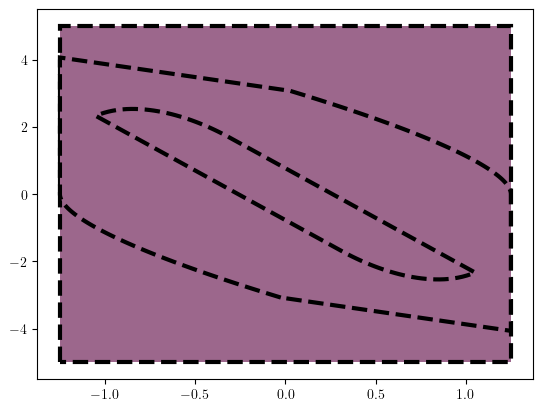

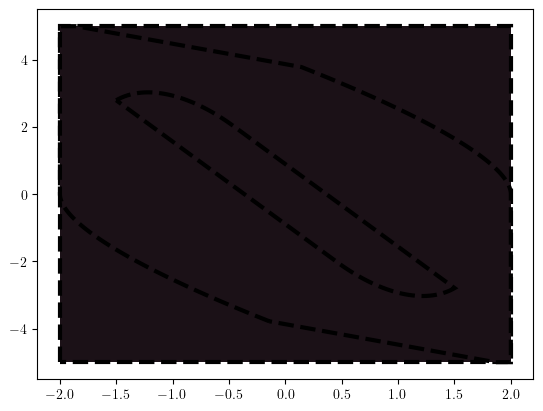

In [314]:
for model in models:
    model.plot_sets()

## Plots

### plot with reference and UAV position in y-axis for spiral/ellipse and figure8 reference trajectory

In [315]:
def save_plot(path, noise = False):
    tplt.clean_figure()
    tplt.save(path+'.tex')
    if noise:
        path = path+'_noise'
    plt.legend(fontsize=plot_legend_font)
    plt.savefig(path+'.pdf',bbox_inches="tight")
    plt.show()
    # plt.savefig(path+'.tex',format="pgf")

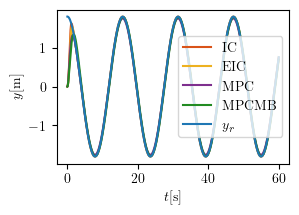

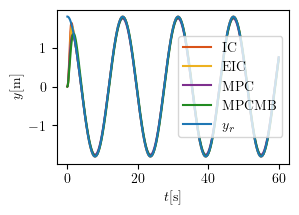

In [316]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3, 2))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][0, :], label=r''+controller.upper(), color = colors[i])
    plt.plot(time, data[trajectory][controllers[0]][1][0, :], label=r'$y_r$', color = ref_color)
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$y\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/y_'+trajectory)
    else:
        plt.legend()
        plt.show()

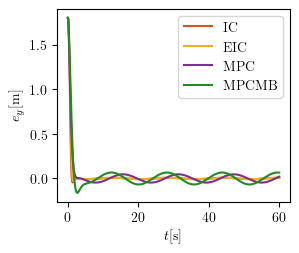

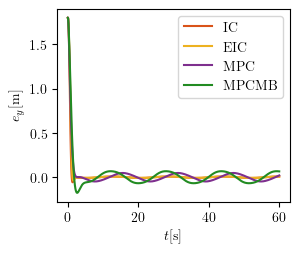

In [317]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controllers[0]][1][0, :]-data[trajectory][controller][0][0, :], label=r''+controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$e_y\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/e_y_'+trajectory)
    else:
        plt.legend()
        plt.show()

### plot with UAV velocity in y-axis for spiral/ellipse and figure8 reference trajectory

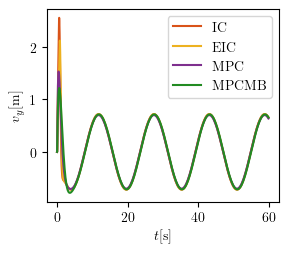

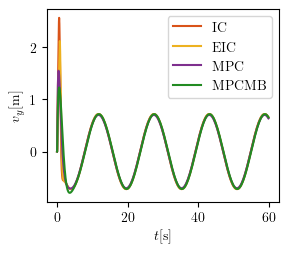

In [318]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][3, :], label=r''+controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$v_y\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/vy_'+trajectory)
    else:
        plt.legend()
        plt.show()

### plot with reference and UAV position in z-axis for spiral/ellipse and figure8 reference trajectory

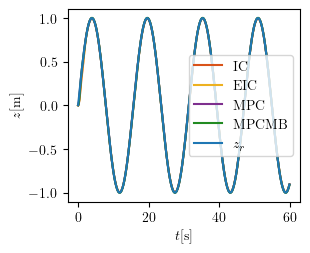

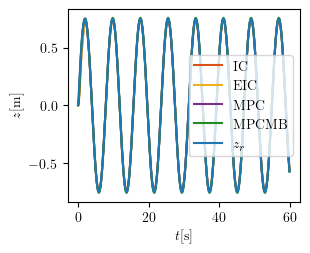

In [319]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][1, :], label=r''+controller.upper(), color = colors[i])
    plt.plot(time, data[trajectory][controllers[0]][1][1, :], label=r'$z_r$', color = ref_color)
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$z\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/z_'+trajectory)
    else:
        plt.legend()
        plt.show()

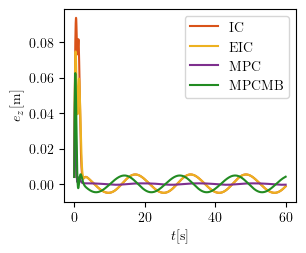

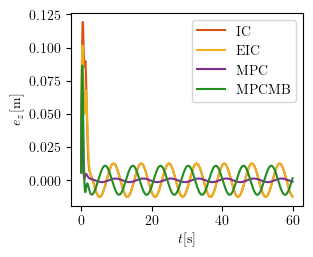

In [320]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controllers[0]][1][1, :]-data[trajectory][controller][0][1, :], label=r''+controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$e_z\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/e_z_'+trajectory)
    else:
        plt.legend()
        plt.show()

### plot with UAV velocity in z-axis for spiral/ellipse and figure8 reference trajectory

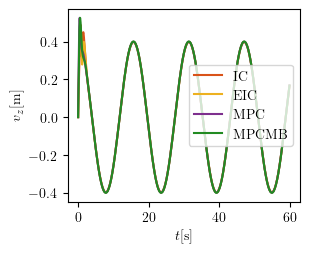

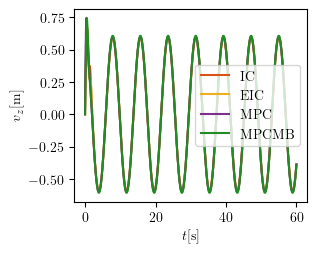

In [321]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(3,2.5))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][4, :], label=r''+controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$v_z\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/vz_'+trajectory)
    else:
        plt.legend()
        plt.show()

### path of UAV for spiral/ellipse and figure8 reference trajectory

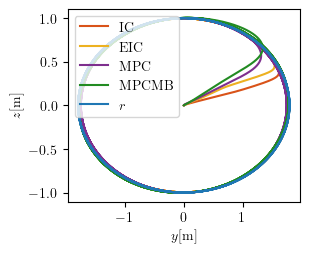

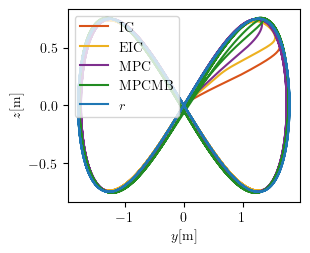

In [322]:
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for controller, color in zip(controllers, colors):
        plt.plot(data[trajectory][controller][0][0, :],
             data[trajectory][controller][0][1, :], label=controller.upper(), color = color)
    plt.plot(data[trajectory][controllers[0]][1][0, :],
             data[trajectory][controllers[0]][1][1, :], label='$r$', color = ref_color)
    plt.xlabel(r'$y\mathrm{[m]}$', fontsize=plot_label_font)
    plt.ylabel(r'$z\mathrm{[m]}$', fontsize=plot_label_font)
    if save_plots:
        tplt.clean_figure()
        tplt.save(folder_results+'plots/traj_'+trajectory+'.tex')
        if noise:
            path = folder_results+'plots/traj_'+trajectory+'_noise'
        plt.legend(loc='upper left', fontsize=plot_legend_font)
        plt.savefig(folder_results+'plots/traj_'+trajectory+'.pdf',bbox_inches="tight")
        plt.show()
        # save_plot(folder_results+'plots/traj_'+trajectory)
    else:
        plt.legend()
        plt.show()


### Ouput of y-controllers, utilized by attitude control as desired angle

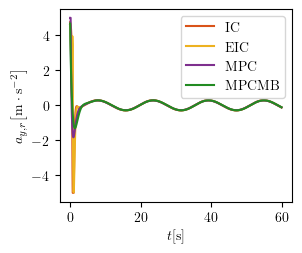

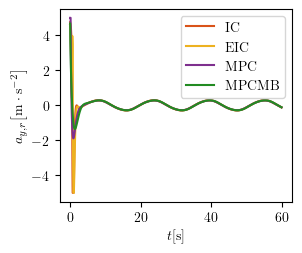

In [323]:
for trajectory in trajectories:
    # plot with control actions
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][2][0, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$a_{y,r}\mathrm{\left[m\cdot s^{-2}\right]}$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/acc_y_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Ouput of z-controllers in form of desired collective thrust

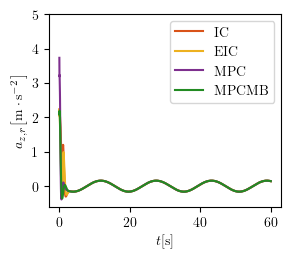

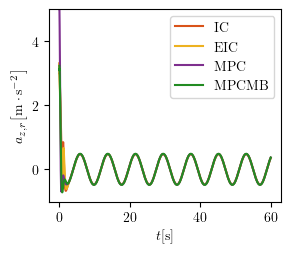

In [324]:
for trajectory in trajectories:
    # plot with control actions
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][2][1, :], label=controller.upper(), color = colors[i])
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
    plt.ylabel(r'$a_{z,r}\mathrm{\left[m\cdot s^{-2}\right]}$', fontsize=plot_label_font)
    plt.ylim(top=5)
    if save_plots:
        save_plot(folder_results+'plots/acc_z_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Time needed to solve LP/QP

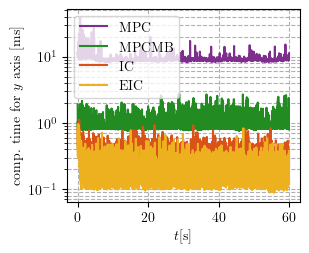

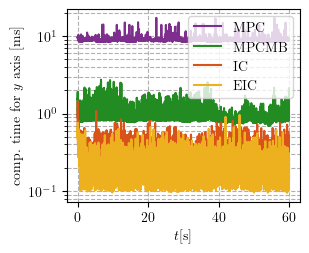

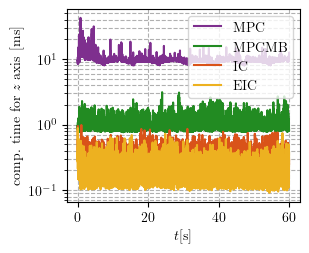

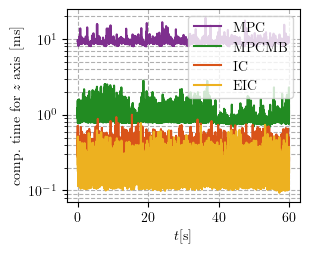

In [325]:
controllers_time = ['mpc','mpcmb','ic','eic'] # to draw in correct order because of overlapping
names = ['y','z']
for i, name in enumerate(names):
    for trajectory in trajectories:
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif')
        plt.figure(figsize=(3,2.5))
        for controller, color in zip(controllers_time,colors_time):
            plt.plot(time, data[trajectory][controller][4][i,:]*1e3, label=controller.upper(), color = color)
        plt.yscale('log')
        plt.grid(True, which="both", linestyle='--')
        plt.xlabel(r'$t\mathrm{[s]}$', fontsize=plot_label_font)
        plt.ylabel(r'comp. time for $'+name+'$ axis $\mathrm{[ms]}$', fontsize=plot_label_font)
        if save_plots:
            save_plot(folder_results+'plots/time_'+name+'_'+trajectory)
        else:
            plt.legend()
            plt.show()

#### Sum of both periods

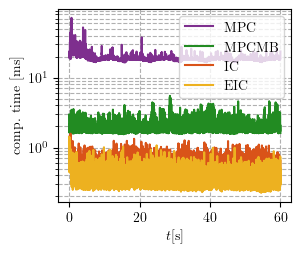

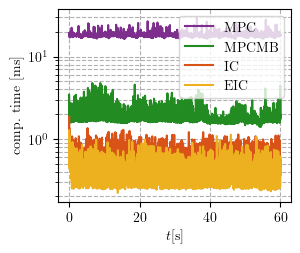

In [326]:
controllers_time = ['mpc','mpcmb','ic','eic'] # to draw in correct order because of overlapping
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for controller, color in zip(controllers_time,colors_time):
        plt.plot(time, np.sum(data[trajectory][controller][4][:,:], 0)*1e3, label=controller.upper(), color = color)
    plt.yscale('log')
    plt.grid(True, which="both", linestyle='--')
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'comp. time [ms]', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/time_sum_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Time needed for control cascade to acquire control action

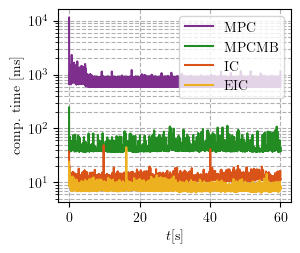

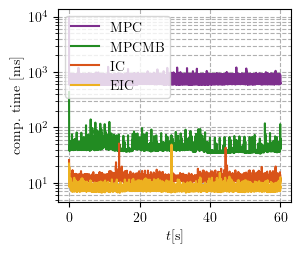

In [327]:
controllers_time = ['mpc','mpcmb','ic','eic'] # to draw in correct order because of overlapping

names = ['y','z']
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    for controller, color in zip(controllers_time,colors_time):
        plt.plot(time, dt_data[trajectory][controller]*1e3, label=controller.upper(), color = color)
    plt.yscale('log')
    plt.grid(True, which="both", linestyle='--')
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'comp. time [ms]', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/time_full_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Interpolating coefficient

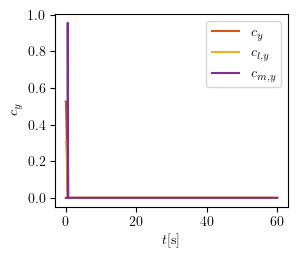

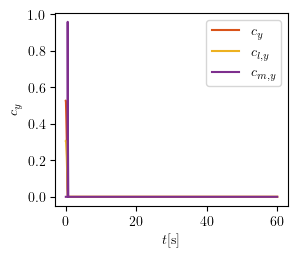

In [328]:
# plot with reference trajectory
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    plt.plot(time, data[trajectory][controllers[0]][3][0, :], label=r'$c_y$', color = colors[0])
    plt.plot(time, data[trajectory][controllers[1]][3][0, 0, :], label=r'$c_{l,y}$', color = colors[1])
    plt.plot(time, data[trajectory][controllers[1]][3][1, 0, :], label=r'$c_{m,y}$', color = colors[2])
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'$c_y$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/c_y_'+trajectory)
    else:
        plt.legend()
        plt.show()

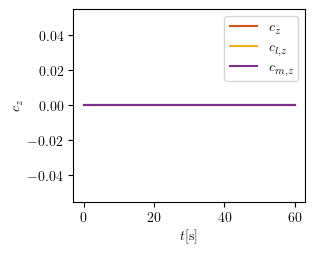

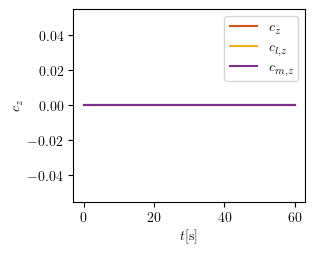

In [329]:
# plot with reference trajectory
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    plt.plot(time, data[trajectory][controllers[0]][3][1, :], label=r'$c_z$', color = colors[0])
    plt.plot(time, data[trajectory][controllers[1]][3][0, 1, :], label=r'$c_{l,z}$', color = colors[1])
    plt.plot(time, data[trajectory][controllers[1]][3][1, 1, :], label=r'$c_{m,z}$', color = colors[2])
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'$c_z$', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/c_z_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Value of criterion from MPCs

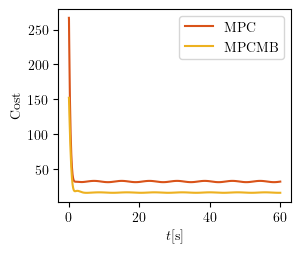

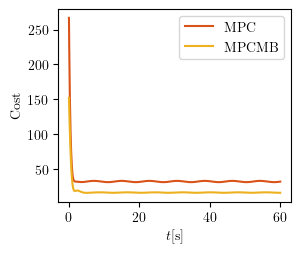

In [330]:
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(3,2.5))
    plt.plot(time, data[trajectory][controllers[2]]
             [3][0, :], label='MPC', color = colors[0])
    plt.plot(time, data[trajectory][controllers[3]]
             [3][0, :], label='MPCMB', color = colors[1])
    plt.xlabel(r'$t$[s]', fontsize=plot_label_font)
    plt.ylabel(r'Cost', fontsize=plot_label_font)
    if save_plots:
        save_plot(folder_results+'plots/mpc_cost_'+trajectory)
    else:
        plt.legend()
        plt.show()

# Optimality, Integral Square Error, and Energy Consumption

In [331]:
nx = data[trajectory][controller][0].shape[0]
Q = np.zeros((nx,nx))
for i, model in enumerate(models):
    Q[i,i] = model.Q_h[0,0]
    Q[i+nx//2,i+nx//2] = model.Q_h[1,1]
    
nu = data[trajectory][controller][2].shape[0]
R = np.zeros((nu,nu))
for i, model in enumerate(models):
    R[i,i] = model.R_h

def eval_crit(state, control, Q, R):
    return state@Q@state.T + control@R@control.T

def signif(x, p):
    x = np.asarray(x)
    x_positive = np.where(np.isfinite(x) & (x != 0), np.abs(x), 10**(p-1))
    mags = 10 ** (p - 1 - np.floor(np.log10(x_positive)))
    return np.round(x * mags) / mags

def perc(x,l):
    return (x/l)*100-100

n = 3
nperc = 2
def eval_table(dict):
    df = pd.DataFrame.from_dict(dict)
    for trajectory in trajectories:
        df[trajectory] = df[trajectory].apply(lambda x: signif(x, n))
        df[trajectory + ' perc.'] = df[trajectory].apply(lambda x: perc(x,df.loc['mpc'].at[trajectory]))
        df[trajectory + ' perc.'] = df[trajectory + ' perc.'].apply(lambda x: np.round(x, nperc))
    return df


def multipar_dict_to_df(nested_dict):
    reformed_dict = {}
    for outerKey, innerDict in nested_dict.items():
        for innerKey, values in innerDict.items():
            reformed_dict[(outerKey,
                        innerKey)] = values
        return pd.DataFrame(reformed_dict)

err = {}
ise = {}
total_ise = {}
total_energy = {}
energy_cons = {}
total_time = {}
max_time = {}
mean_time = {}
std_time = {}
crit = {}
for trajectory in trajectories:
    for controller in controllers:
        err_temp = []
        crit_temp = []
        for i, model in enumerate(models):
            err_temp.append(data[trajectory][controller][1][i,:] - data[trajectory][controller][0][i,:])
        err.setdefault(trajectory, {})[controller] = np.array(err_temp)
        ise_temp = model.dt*np.sum((err[trajectory][controller][:,:]**2), 1)
        ise.setdefault(trajectory, {})[controller] =  np.hstack((ise_temp, np.sum(ise_temp)))
        energy_temp = model.dt*np.sum((data[trajectory][controller][2][:,:]**2), 1)
        energy_cons.setdefault(trajectory, {})[controller] = np.hstack((energy_temp, np.sum(energy_temp)))
        total_time_temp = np.sum(data[trajectory][controller][4],1)
        total_time.setdefault(trajectory, {})[controller] = np.hstack((total_time_temp, np.sum(total_time_temp)))
        mean_time_temp = np.mean(data[trajectory][controller][4]*1e3,1)
        mean_time.setdefault(trajectory, {})[controller] = np.hstack((mean_time_temp, np.mean(mean_time_temp)))
        std_time_temp = np.std(data[trajectory][controller][4]*1e3,1)
        std_time.setdefault(trajectory, {})[controller] = np.hstack((std_time_temp, np.std(std_time_temp)))
        max_time_temp = np.max(data[trajectory][controller][4]*1e3,1)
        max_time.setdefault(trajectory, {})[controller] = np.hstack((max_time_temp, np.max(max_time_temp)))
        total_ise.setdefault(trajectory, {})[controller] =  np.sum(ise_temp)
        total_energy.setdefault(trajectory, {})[controller] =  np.sum(energy_temp)
        crit.setdefault(trajectory, {})[controller] = np.sum(np.fromiter((eval_crit(data[trajectory][controller][1][:,k]-data[trajectory][controller][0][:,k], data[trajectory][controller][2][:,k], Q, R) for k in range(Nsim)), float))
    

### Criterion of optimality

Angle and angular rate in state vector are not reflected in criterion value as well as the torque, because they are manipulated by attitude controller.

In [332]:
df_crit = eval_table(crit)
df_crit[trajectories] = df_crit[trajectories].astype(int)
df_crit

,spiral,figure8,spiral perc.,figure8 perc.
ic,10200,10100,-14.29,-14.41
eic,11600,11500,-2.52,-2.54
mpc,11900,11800,0.00,0.00
mpcmb,14500,14500,21.85,22.88


### ISE

for each controller and sum

In [333]:
df_ise = eval_table(ise)
df_total_ise = eval_table(total_ise)
df_ise

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[1.51, 0.00988, 1.52]","[1.48, 0.0179, 1.5]","[-16.11, 1242.39, -15.56]","[-15.91, 1235.82, -14.77]"
eic,"[1.74, 0.00607, 1.75]","[1.71, 0.0132, 1.73]","[-3.33, 724.73, -2.78]","[-2.84, 885.07, -1.7]"
mpc,"[1.8, 0.000736, 1.8]","[1.76, 0.00134, 1.76]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
mpcmb,"[2.2, 0.00221, 2.21]","[2.18, 0.00637, 2.19]","[22.22, 200.27, 22.78]","[23.86, 375.37, 24.43]"


In [334]:
ise

{'spiral': {'ic': array([1.51063, 0.00988, 1.52051]),
  'eic': array([1.73973, 0.00607, 1.7458 ]),
  'mpc': array([1.80182, 0.00074, 1.80255]),
  'mpcmb': array([2.2033 , 0.00221, 2.20551])},
 'figure8': {'ic': array([1.48006, 0.0179 , 1.49796]),
  'eic': array([1.71219, 0.01318, 1.72537]),
  'mpc': array([1.76212, 0.00134, 1.76346]),
  'mpcmb': array([2.18445, 0.00637, 2.19083])}}

### Energy consumption

for each controller and sum

In [335]:
df_energy = eval_table(energy_cons)
df_total_energy = eval_table(total_energy)
df_energy

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[23.7, 3.17, 26.9]","[24.1, 9.65, 33.8]","[125.71, 3.26, 99.26]","[131.73, -11.47, 59.43]"
eic,"[18.1, 2.34, 20.4]","[18.5, 8.79, 27.3]","[72.38, -23.78, 51.11]","[77.88, -19.36, 28.77]"
mpc,"[10.5, 3.07, 13.5]","[10.4, 10.9, 21.2]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
mpcmb,"[7.42, 2.01, 9.43]","[7.45, 9.3, 16.8]","[-29.33, -34.53, -30.15]","[-28.37, -14.68, -20.75]"


### Merged table

In [336]:
def get_crit_table(df, original_names, new_name):
    df_merged = []
    for i, original_name in enumerate(original_names):
        df_merged.append(df.filter(regex=original_name, axis=1).copy())
        df_merged[-1].rename(columns = {original_name: new_name, original_name + ' perc.': new_name+' %'}, inplace = True)
        
    return df_merged
df_merged_crit = get_crit_table(df_crit, trajectories, 'J')
df_merged_ise = get_crit_table(df_total_ise, trajectories, 'ISE')
df_merged_energy = get_crit_table(df_total_energy, trajectories, 'E')

df_merged_crit, df_merged_ise, df_merged_energy

([           J    J %
  ic     10200 -14.29
  eic    11600  -2.52
  mpc    11900   0.00
  mpcmb  14500  21.85,
             J    J %
  ic     10100 -14.41
  eic    11500  -2.54
  mpc    11800   0.00
  mpcmb  14500  22.88],
 [        ISE  ISE %
  ic     1.52 -15.56
  eic    1.75  -2.78
  mpc    1.80   0.00
  mpcmb  2.21  22.78,
          ISE  ISE %
  ic     1.50 -14.77
  eic    1.73  -1.70
  mpc    1.76   0.00
  mpcmb  2.19  24.43],
 [           E    E %
  ic     26.90  99.26
  eic    20.40  51.11
  mpc    13.50   0.00
  mpcmb   9.43 -30.15,
            E    E %
  ic     33.8  59.43
  eic    27.3  28.77
  mpc    21.2   0.00
  mpcmb  16.8 -20.75])

In [337]:
def merge_tables(list_of_tables):
    dfs_merged = []
    for i, trajectory in enumerate(trajectories):
        merge = list_of_tables[0][i].copy()
        for j in range(1,len(list_of_tables)):
            merge = pd.merge(merge, list_of_tables[j][i], left_index=True, right_index=True,how='outer')
        dfs_merged.append(merge)
    return dfs_merged

dfs_merged = merge_tables([df_merged_crit, df_merged_ise, df_merged_energy])
dfs_merged

[           J    J %   ISE  ISE %      E    E %
 ic     10200 -14.29  1.52 -15.56  26.90  99.26
 eic    11600  -2.52  1.75  -2.78  20.40  51.11
 mpc    11900   0.00  1.80   0.00  13.50   0.00
 mpcmb  14500  21.85  2.21  22.78   9.43 -30.15,
            J    J %   ISE  ISE %     E    E %
 ic     10100 -14.41  1.50 -14.77  33.8  59.43
 eic    11500  -2.54  1.73  -1.70  27.3  28.77
 mpc    11800   0.00  1.76   0.00  21.2   0.00
 mpcmb  14500  22.88  2.19  24.43  16.8 -20.75]

In [338]:
for df, trajectory in zip(dfs_merged, trajectories):
    buf = folder_results+"table_crit_2dnonlin_"+trajectory+".tex"
    caption = "Evaluation of the criterion, ISE, and energy consumption for the MPC, MPCMB IC, and eIC for the tracking of "+trajectory+" reference trajectory with planar UAV model"
    label = "tab:comparison-crit-2d-"+trajectory+""
    column_format = "lrrrr"
    s = df.style
    s.format({
        ("J %"): '{:,.2f}',
        ("ISE %"): '{:,.2f}',
        ("ISE"): '{:,.2f}',
        ("E %"): '{:,.2f}',
        ("E"): '{:,.2f}',
        }, precision=4)
    # form = [None, '${:,.2f}'.format, None, '${:,.2f}'.format]
    s.to_latex(buf = buf, caption = caption, label = label, column_format = column_format, hrules=True)

### Total time for solving the LPs/QPs

for each controller and sum

In [339]:
df_time_total = eval_table(total_time)
df_time_total

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[1.64, 1.8, 3.44]","[1.64, 1.8, 3.43]","[-97.03, -96.92, -96.98]","[-96.95, -96.73, -96.85]"
eic,"[1.11, 1.14, 2.25]","[1.14, 1.15, 2.29]","[-97.99, -98.05, -98.03]","[-97.88, -97.91, -97.9]"
mpc,"[55.3, 58.4, 114.0]","[53.8, 55.1, 109.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
mpcmb,"[6.02, 6.02, 12.0]","[5.8, 5.78, 11.6]","[-89.11, -89.69, -89.47]","[-89.22, -89.51, -89.36]"


### MAX Period for solving the LPs/QPs

for each controller and global max in [ms]

In [340]:
df_time_max = eval_table(max_time)
df_time_max

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[1.12, 0.987, 1.12]","[1.45, 1.0, 1.45]","[-97.1, -97.68, -97.37]","[-91.57, -94.76, -92.41]"
eic,"[0.962, 0.887, 0.962]","[0.96, 0.779, 0.96]","[-97.51, -97.92, -97.74]","[-94.42, -95.92, -94.97]"
mpc,"[38.6, 42.6, 42.6]","[17.2, 19.1, 19.1]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
mpcmb,"[2.78, 3.13, 3.13]","[2.74, 2.83, 2.83]","[-92.8, -92.65, -92.65]","[-84.07, -85.18, -85.18]"


### Mean Period for solving the LPs/QPs

for each controller and global mean in [ms]

In [341]:
df_time_mean = eval_table(mean_time)
df_time_mean

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[0.273, 0.3, 0.286]","[0.273, 0.299, 0.286]","[-97.04, -96.92, -96.98]","[-96.96, -96.75, -96.85]"
eic,"[0.186, 0.19, 0.188]","[0.19, 0.192, 0.191]","[-97.98, -98.05, -98.02]","[-97.88, -97.91, -97.9]"
mpc,"[9.22, 9.73, 9.48]","[8.97, 9.19, 9.08]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
mpcmb,"[1.0, 1.0, 1.0]","[0.968, 0.964, 0.966]","[-89.15, -89.72, -89.45]","[-89.21, -89.51, -89.36]"


### STD Period for solving the LPs/QPs

for each controller and global STD in [ms]

In [342]:
df_time_std = eval_table(std_time)
df_time_std

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[0.0909, 0.088, 0.00148]","[0.091, 0.0877, 0.00168]","[-93.6, -94.6, -98.58]","[-82.36, -87.42, -98.14]"
eic,"[0.0752, 0.076, 0.000378]","[0.0772, 0.0759, 0.000662]","[-94.7, -95.34, -99.64]","[-85.04, -89.11, -99.27]"
mpc,"[1.42, 1.63, 0.104]","[0.516, 0.697, 0.0901]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
mpcmb,"[0.267, 0.261, 0.0029]","[0.247, 0.251, 0.00194]","[-81.2, -83.99, -97.21]","[-52.13, -63.99, -97.85]"


### Period evaluation for whole cascade

In [343]:
df_dt = multipar_dict_to_df(dt_data)
print("max dt [ms]:")
print(df_dt.max()*1e3)
print("mean dt [ms]:")
print(df_dt.mean()*1e3)
print("std dt [ms]:")
print(df_dt.std()*1e3)
print("sum dt [s]:")
print(df_dt.sum())

max dt [ms]:
spiral  ic          48.845053
        eic         44.720650
        mpc      11323.009491
        mpcmb      245.336294
dtype: float64
mean dt [ms]:
spiral  ic        11.984360
        eic        8.002601
        mpc      659.445862
        mpcmb     44.897372
dtype: float64
std dt [ms]:
spiral  ic         1.355995
        eic        1.043686
        mpc      184.954524
        mpcmb      9.271763
dtype: float64
sum dt [s]:
spiral  ic         71.894177
        eic        48.007605
        mpc      3956.015729
        mpcmb     269.339332
dtype: float64


In [344]:
def print_statictics(df):
    print("max dt [ms]:")
    print(df.max()*1e3)
    print("mean dt [ms]:")
    print(df.mean()*1e3)
    print("std dt [ms]:")
    print(df.std()*1e3)
    print("sum dt [s]:")
    print(df.sum())
    
def get_time_eval(df):
    df_eval = pd.DataFrame()
    df_eval['t [s]'] = df.sum().round().astype(int)
    df_eval['t %'] = df_eval.apply(lambda x: perc(x,df_eval.loc['mpc'].at['t [s]'])).round(nperc)
    df_eval['t_max [ms]'] = df_dt_figure8.max()*1e3
    df_eval['t_max [ms]'] = df_eval['t_max [ms]'].round().astype(int)
    df_eval['t_max %'] = df_eval['t_max [ms]'].apply(lambda x: perc(x,df_eval.loc['mpc'].at['t_max [ms]'])).round(nperc)
    return df_eval

df_dt_figure8 = pd.DataFrame.from_dict(dt_data['figure8'])
df_dt_spiral = pd.DataFrame.from_dict(dt_data['spiral'])
df_dt_stat = []
df_dt_stat.append(get_time_eval(df_dt_spiral))
df_dt_stat.append(get_time_eval(df_dt_figure8))


In [345]:
df_dt_stat[0]

,t [s],t %,t_max [ms],t_max %
ic,72,-98.18,51,-99.46
eic,48,-98.79,49,-99.48
mpc,3956,0.00,9499,0.00
mpcmb,269,-93.20,435,-95.42


In [346]:
df_dt_stat[1]

,t [s],t %,t_max [ms],t_max %
ic,72,-98.14,51,-99.46
eic,49,-98.74,49,-99.48
mpc,3874,0.00,9499,0.00
mpcmb,258,-93.34,435,-95.42


In [347]:
for df, trajectory in zip(df_dt_stat, trajectories):
    buf = folder_results+"table_time_2dnonlin_"+trajectory+".tex"
    caption = "The time demands for IC, eIC, MPC and MPCMB for the tracking of "+trajectory+" reference trajectory with planar UAV model"
    label = "tab:comparison-time-2d-"+trajectory+""
    column_format = "lrrrr"
    s = df.style
    s.format({
        ("t %"): '{:,.2f}',
        ("t_max %"): '{:,.2f}'
        })
    # form = [None, '${:,.2f}'.format, None, '${:,.2f}'.format]
    s.to_latex(buf = buf, caption = caption, label = label, column_format = column_format, hrules=True)

In [348]:
print("spiral:")
print_statictics(df_dt_spiral)

spiral:
max dt [ms]:
ic          48.845053
eic         44.720650
mpc      11323.009491
mpcmb      245.336294
dtype: float64
mean dt [ms]:
ic        11.984360
eic        8.002601
mpc      659.445862
mpcmb     44.897372
dtype: float64
std dt [ms]:
ic         1.355995
eic        1.043686
mpc      184.954524
mpcmb      9.271763
dtype: float64
sum dt [s]:
ic         71.894177
eic        48.007605
mpc      3956.015729
mpcmb     269.339332
dtype: float64


In [349]:
print("figure8:")
print_statictics(df_dt_figure8)

figure8:
max dt [ms]:
ic         51.295757
eic        48.960924
mpc      9498.565435
mpcmb     434.501886
dtype: float64
mean dt [ms]:
ic        11.927546
eic        8.126686
mpc      645.723636
mpcmb     43.043986
dtype: float64
std dt [ms]:
ic         1.313364
eic        1.044970
mpc      148.020242
mpcmb      9.815887
dtype: float64
sum dt [s]:
ic         71.553349
eic        48.751990
mpc      3873.696094
mpcmb     258.220872
dtype: float64
